[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/aoguedao/math685_numerical_analysis/blob/main/homeworks/hwk01.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.special import factorial

%matplotlib inline

In [2]:
images_path = Path("./images/hwk01")

## Exercise 1

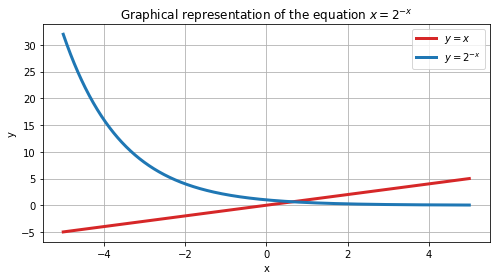

In [3]:
x_array = np.arange(-5, 5, 0.01)
y_array = 2 ** (-x_array)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_array, x_array, color="tab:red", linewidth=3, label=r"$y = x$")
ax.plot(x_array, y_array, color="tab:blue", linewidth=3, label=r"$y = 2^{-x}$")
ax.set_title(r"Graphical representation of the equation $x=2^{-x}$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(images_path / "exercise01.png", dpi=300)
fig.show()

## Exercise 5

In [4]:
def log_taylor_approx(x, x0, n):
    """ Taylor expansion approximation of natural logarithm.

    Parameters
    ----------
    x : array_like
        Where is going to be evaluate.
    x0 : float
        Fixed point about expansion.
    n : int
        Expansion order.

    Returns
    -------
    array_like

    Raises
    ------
    AttributeError
        If order is non-negative or not int.
    """   
    if not isinstance(n, int) or (n < 0):
        raise AttributeError("order 'n' must be non-negative integer")
    taylor_term = lambda x, x0, k: ((-1) ** (k -1) * ((x - x0) / x0) ** k) / k
    value = np.sum([taylor_term(x, x0, k) for k in range(1, n + 1)], axis=0)
    return np.log(x0) + value

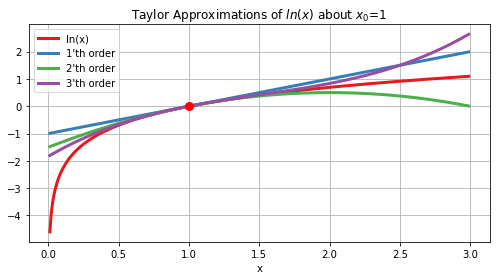

In [5]:
x0 = 1
n = 3
x_values = np.arange(0.01, 3, 0.01)

colors = plt.get_cmap("Set1").colors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_values, np.log(x_values), color=colors[0], linewidth=3, label="ln(x)")
for i in range(1, n+ 1):
    ax.plot(x_values, log_taylor_approx(x_values, x0, i), color=colors[i], linewidth=3, label=f"{i}'th order")
ax.plot(x0, np.log(x0), 'ro', markersize=8)
ax.set_title(rf"Taylor Approximations of $ln(x)$ about $x_0$={x0}")
ax.set_xlabel("x")
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(images_path / "exercise05_0_to_3.png", dpi=300)
fig.show()

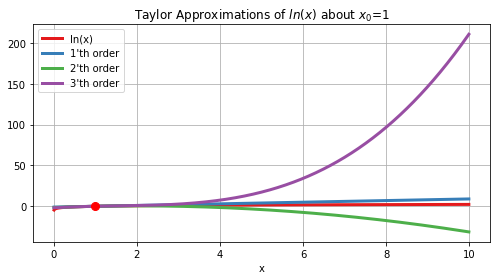

In [6]:
x0 = 1
n = 3
x_values = np.arange(0.01, 10, 0.01)

colors = plt.get_cmap("Set1").colors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_values, np.log(x_values), color=colors[0], linewidth=3, label="ln(x)")
for i in range(1, n+ 1):
    ax.plot(
        x_values,
        log_taylor_approx(x_values, x0, i),
        color=colors[i],
        linewidth=3,
        label=f"{i}'th order"
    )
ax.plot(x0, np.log(x0), 'ro', markersize=8)
ax.set_title(rf"Taylor Approximations of $ln(x)$ about $x_0$={x0}")
ax.set_xlabel("x")
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(images_path / "exercise05_0_to_10.png", dpi=300)
fig.show()

In [7]:
def absolute_error(real, pred):
    return np.abs(pred - real)

def relative_error(real, pred):
    return np.abs((pred - real) / real)

In [8]:
x = 1.5 
real_value = np.log(x)
accuracy = 1e-3
def error_convergence(f, x, real_value, error_f, accuracy):
    """ Returns a errors of a given functions for a given error function. 

    Parameters
    ----------
    f : function
        Approximation function
    x : array_like
        Value to predict
    real_value: int, float
        Real value of the prediction
    error_f: function
        Error function
    accuracy: float
        Accuracy for stopping loop

    Returns
    -------
    pd.Series
    """    
    error_s = pd.Series(dtype="float64", name="Error").rename_axis("Degree")
    converge = False
    i = 0
    while not converge:
        pred_value = f(x, x0, i)
        error = error_f(real_value, pred_value)
        error_s.loc[i] = error
        if error > accuracy:
            i += 1
        else:
            converge = True
    return error_s

In [10]:
absolute_error_serie = error_convergence(
    log_taylor_approx,
    x,
    real_value,
    absolute_error,
    accuracy
)
absolute_error_serie

Degree
0    0.405465
1    0.094535
2    0.030465
3    0.011202
4    0.004423
5    0.001827
6    0.000778
Name: Error, dtype: float64

In [ ]:
relative_error_serie = error_convergence(
    log_taylor_approx,
    x,
    real_value,
    relative_error,
    accuracy
)
relative_error_serie

Degree
0    1.000000
1    0.233152
2    0.075136
3    0.027626
4    0.010910
5    0.004505
6    0.001918
7    0.000835
Name: Error, dtype: float64

In [13]:
print(
    absolute_error_serie.to_latex(
        label="tab:q05b_absolute",
        caption="Absolute error of Taylor approximations for each degree."
    )
)

\begin{table}
\centering
\caption{Absolute error of Taylor approximations for each degree.}
\label{tab:q05b_absolute}
\begin{tabular}{lr}
\toprule
{} &     Error \\
Degree &           \\
\midrule
0      &  0.405465 \\
1      &  0.094535 \\
2      &  0.030465 \\
3      &  0.011202 \\
4      &  0.004423 \\
5      &  0.001827 \\
6      &  0.000778 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
print(
    relative_error_serie.to_latex(
        label="tab:q05b_relative",
        caption="Relative error of Taylor approximations for each degree."
    )
)

\begin{table}
\centering
\caption{Relative error of Taylor approximations for each degree.}
\label{tab:q05b_relative}
\begin{tabular}{lr}
\toprule
{} &     Error \\
Degree &           \\
\midrule
0      &  1.000000 \\
1      &  0.233152 \\
2      &  0.075136 \\
3      &  0.027626 \\
4      &  0.010910 \\
5      &  0.004505 \\
6      &  0.001918 \\
7      &  0.000835 \\
\bottomrule
\end{tabular}
\end{table}



## Exercise 6

In [14]:
x = 4
n = 10
xk_s = pd.Series([x], name="x_k").rename_axis("k")
print(f"x_0 = {x}")
for k in range(1, n + 1):
    x = (x ** 2 + 9) / (2 * x)
    xk_s.loc[k] = x
xk_s

x_0 = 4


k
0     4.000000
1     3.125000
2     3.002500
3     3.000001
4     3.000000
5     3.000000
6     3.000000
7     3.000000
8     3.000000
9     3.000000
10    3.000000
Name: x_k, dtype: float64

In [15]:
print(
    xk_s.to_latex(
        float_format="%.20f",
        label="tab:q06c",
        caption="First 10 terms of the sequence $\{x_k\}$."
    )
)

\begin{table}
\centering
\caption{First 10 terms of the sequence $\{x_k\}$.}
\label{tab:q06c}
\begin{tabular}{lr}
\toprule
{} &                    x\_k \\
k  &                        \\
\midrule
0  & 4.00000000000000000000 \\
1  & 3.12500000000000000000 \\
2  & 3.00249999999999994671 \\
3  & 3.00000104079933382906 \\
4  & 3.00000000000018030022 \\
5  & 2.99999999999999955591 \\
6  & 3.00000000000000044409 \\
7  & 3.00000000000000000000 \\
8  & 3.00000000000000000000 \\
9  & 3.00000000000000000000 \\
10 & 3.00000000000000000000 \\
\bottomrule
\end{tabular}
\end{table}



## Exercise 7

In [16]:
from sympy import *
from sympy.plotting import plot

In [17]:
x_symbol = symbols("x")
f = sin(x_symbol ** 2)
x0 = 0
terms_list = [2, 5, 10]
max_terms = max(terms_list)
derivative_values = {}
i = 1 
while len(derivative_values) != max_terms:
    fi = lambdify(x_symbol, diff(f, x_symbol, i), 'numpy')
    fi_x0 = fi(x0)
    if fi_x0 != 0:
        derivative_values[i + 1] = fi_x0
    i += 1

In [18]:
derivative_values

{3: 2.0,
 7: -120.0,
 11: 30240.0,
 15: -17297280.0,
 19: 17643225600.0,
 23: -28158588057600.0,
 27: 6.476475253248e+16,
 31: -2.0284320493172736e+20,
 35: 8.300343945806283e+23,
 39: -4.299578163927655e+27}

In [20]:
def q7_taylor_approx(x, n_terms, derivative_values):
    """ Taylor expansion approximation of I(x) about x=0.

    Parameters
    ----------
    x : array_like
        Where is going to be evaluate.
    n_terms : ints
        Number of terms for approximation.
    derivative_values : dict
        Keys are derivate order and values are derivate values non-null of I(x).

    Returns
    -------
    array_like

    Raises
    ------
    AttributeError
        If n_terms are not a integer greater than zero.
    """ 
    x = np.asarray(x)
    if not isinstance(n_terms, int) or (n < 1):
        raise AttributeError("'n_terms' must be an integer greater than 0")
    derivatives = {
        k: v for k, v in derivative_values.items()
        if k in np.sort(list(derivative_values.keys()))[:n_terms]
    }
    output = np.sum(
        [value * (x ** i) / factorial(i) for i, value in derivatives.items()],
        axis=0
    )
    return output

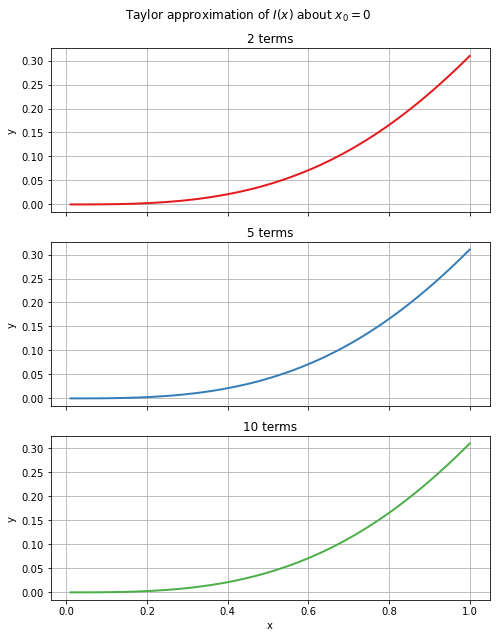

In [21]:
## Ploting
x_array = np.arange(0.01, 1.01, 0.01)
colors = plt.get_cmap("Set1").colors
fig, axs = plt.subplots(3, 1, figsize=(7, 9), sharex=True, sharey=True)
for index, i in enumerate(terms_list):
    axs[index].plot(x_array, q7_taylor_approx(x_array, i, derivative_values), color=colors[index], linewidth=2, label=f"{i} terms")
    axs[index].set_ylabel("y")
    axs[index].grid()
    axs[index].set_title(f"{i} terms")
axs[-1].set_xlabel("x")
fig.suptitle(r"Taylor approximation of $I(x)$ about $x_0 = 0$") 
fig.tight_layout()
plt.savefig(images_path / "exercise07.png", dpi=300)
fig.show()

In [22]:
Ix_df = pd.DataFrame(columns=["Approximation", "Absolute Error",  "Relative Error"]).rename_axis("N Terms")
I1 = integrate(f, (x_symbol, 0, 1)).evalf()
for n in terms_list:
    pred_value = q7_taylor_approx(1, n, derivative_values)
    a_error = absolute_error(I1, pred_value)
    r_error = relative_error(I1, pred_value)
    Ix_df.loc[n] = [pred_value, a_error, r_error]
Ix_df

,Approximation,Absolute Error,Relative Error
N Terms,,,
2,0.309523809523810,0.000744492199571567,0.00239951098915453
5,0.310268302806680,1.08329889503267e-9,3.49149071631069e-9
10,0.310268301723381,0,0


In [23]:
print(
    Ix_df.to_latex(
        float_format="%.20f",
        label="tab:q07b_errors",
        caption="Approximation and errors values for differente number of terms of $I(1)$."
    )
)

\begin{table}
\centering
\caption{Approximation and errors values for differente number of terms of $I(1)$.}
\label{tab:q07b_errors}
\begin{tabular}{llll}
\toprule
{} &      Approximation &        Absolute Error &       Relative Error \\
N Terms &                    &                       &                      \\
\midrule
2       &  0.309523809523810 &  0.000744492199571567 &  0.00239951098915453 \\
5       &  0.310268302806680 &   1.08329889503267e-9 &  3.49149071631069e-9 \\
10      &  0.310268301723381 &                     0 &                    0 \\
\bottomrule
\end{tabular}
\end{table}

